# Pre-processing data
#### meaning zero fun yet

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.python.keras import layers

print(tf.__version__)

2.9.1


In [3]:
universal_epochs=100

column_names = ['Date', "Avg Temp F" 'Max Temp F', 'Min Temp F', "Precipitation in", 'Snow in', "Snow Depth in", "Next Avg Temp F"]

var_to_train = 'Next TAVG (Degrees Fahrenheit)'
var_bridge = 'TAVG (Degrees Fahrenheit)'

raw_dataset = pd.read_csv("D:\\Desktop\\IRP\\data copy 2.csv", usecols=[0,1,2,3,4,5,6,7], header=1)
# Date begins at 1962-01-01, using numbers cus dates are categorical-ish?

In [4]:
dataset = raw_dataset.copy()

In [5]:
dataset.isna().sum()
# NA VALUES YIKES!!!!!!!!!!
# im just gonna remove those and hope they dont hurt me later cus its like 63 pieces of data out of 20,000+
dataset = dataset.dropna()

In [6]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [7]:
train_dataset

,Date,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches),Next TAVG (Degrees Fahrenheit)
549,550,60.0,76,44.0,0.00,0.0,0.0,65.0
7997,7998,33.0,55,18.0,0.00,0.0,0.0,38.0
323,324,42.0,49,34.0,0.62,0.0,0.0,35.0
2257,2258,58.0,60,55.0,1.12,0.0,0.0,63.0
2096,2097,39.0,52,26.0,0.00,0.0,0.0,37.0
...,...,...,...,...,...,...,...,...
7093,7094,65.0,69,58.0,0.00,0.0,0.0,58.0
8487,8488,76.0,86,71.0,0.07,0.0,0.0,80.0
7577,7578,47.0,54,36.0,0.00,0.0,0.0,39.0
8512,8513,80.0,90,69.0,0.00,0.0,0.0,76.0


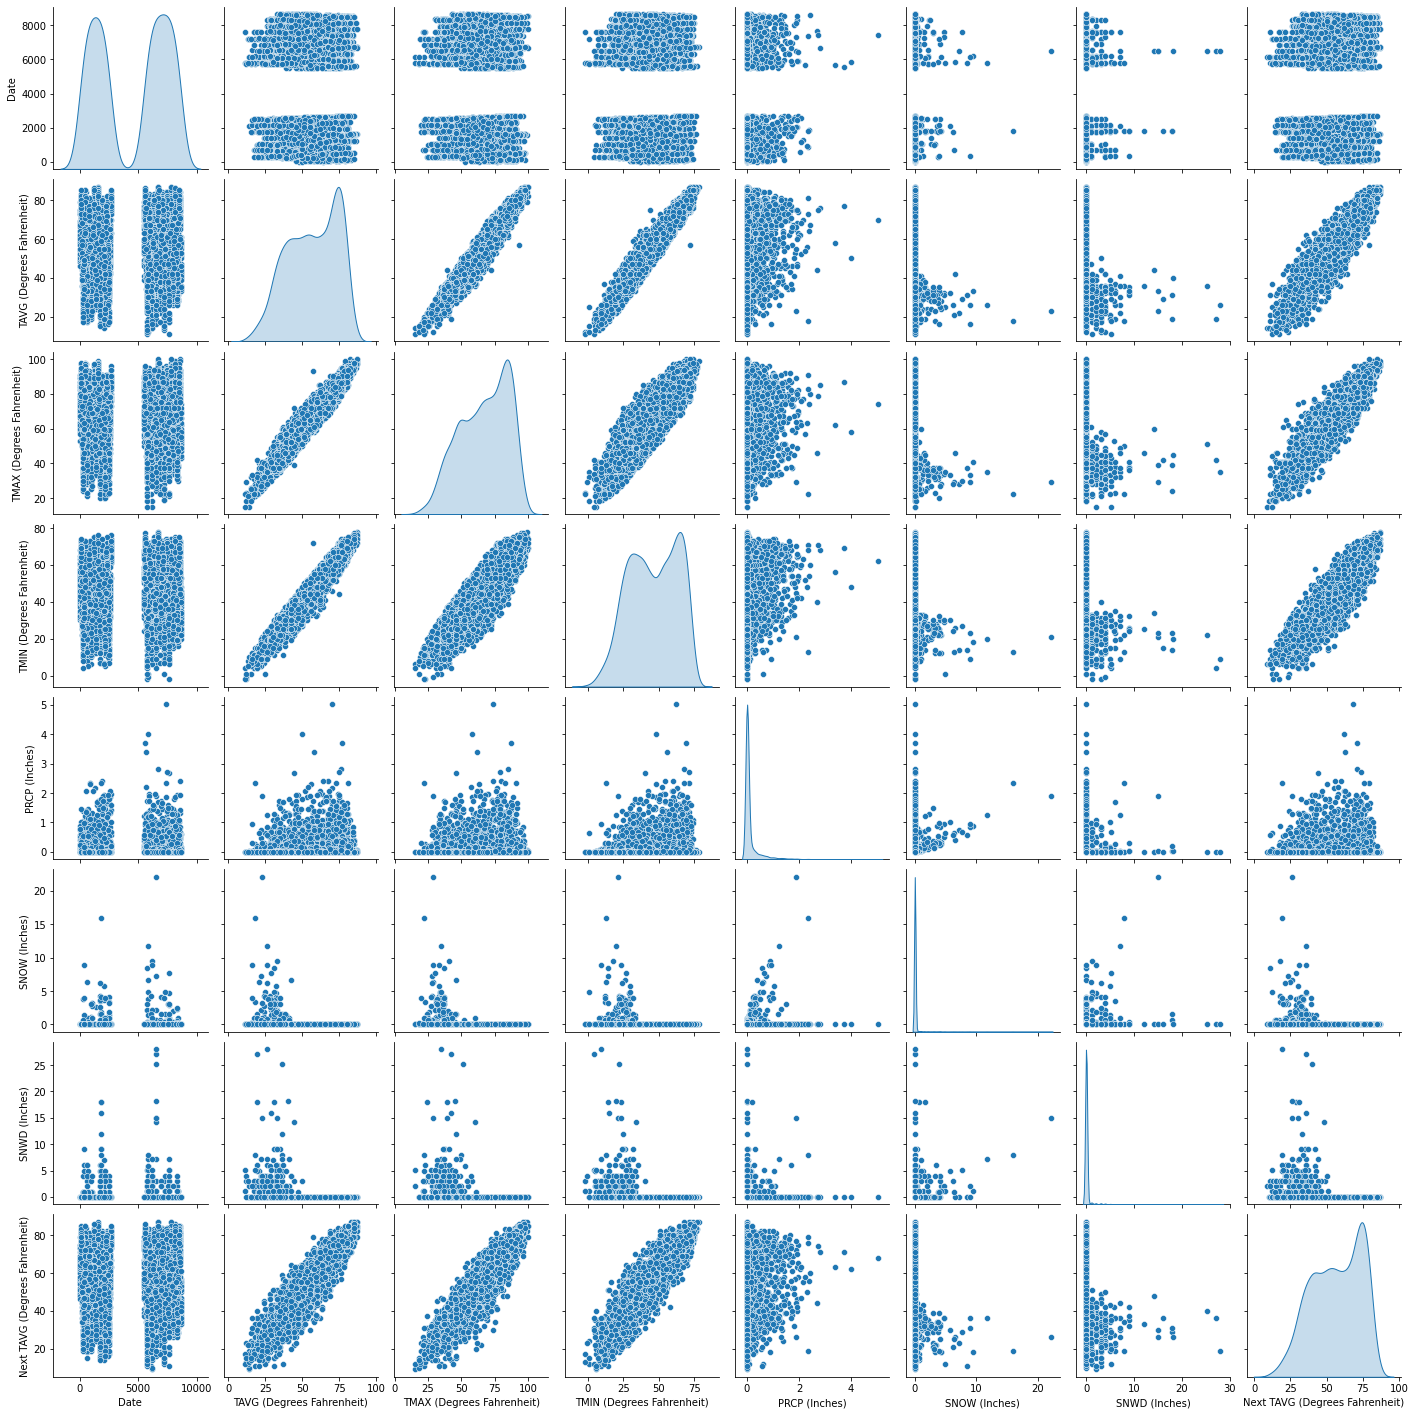

In [8]:
sns.pairplot(train_dataset[['Date', 'TAVG (Degrees Fahrenheit)', 'TMAX (Degrees Fahrenheit)', 'TMIN (Degrees Fahrenheit)', "PRCP (Inches)", 'SNOW (Inches)', "SNWD (Inches)", 'Next TAVG (Degrees Fahrenheit)']], diag_kind='kde')

In [9]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Date,4670.0,4468.909636,2980.934983,2.0,1472.5,5747.5,7204.75,8675.00
TAVG (Degrees Fahrenheit),4670.0,56.516702,16.998836,11.0,43.0,58.0,72.00,87.00
TMAX (Degrees Fahrenheit),4670.0,66.806852,18.080516,15.0,52.0,69.0,83.00,100.00
TMIN (Degrees Fahrenheit),4670.0,45.863169,17.044130,-2.0,32.0,46.0,61.00,78.00
PRCP (Inches),4670.0,0.120621,0.329688,0.0,0.0,0.0,0.04,5.02
SNOW (Inches),4670.0,0.062184,0.638485,0.0,0.0,0.0,0.00,22.10
SNWD (Inches),4670.0,0.146916,1.143465,0.0,0.0,0.0,0.00,28.00
Next TAVG (Degrees Fahrenheit),4670.0,56.478587,17.068678,9.0,43.0,58.0,72.00,87.00


In [10]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()
# I will try to predict max temp given all the other things
train_labels = train_features.pop(var_to_train)
test_labels = test_features.pop(var_to_train)

In [11]:
train_dataset.describe().transpose()[['mean', 'std']] #These values are not normalized which may cause some problems so lets fix that

,mean,std
Date,4468.909636,2980.934983
TAVG (Degrees Fahrenheit),56.516702,16.998836
TMAX (Degrees Fahrenheit),66.806852,18.080516
TMIN (Degrees Fahrenheit),45.863169,17.044130
PRCP (Inches),0.120621,0.329688
SNOW (Inches),0.062184,0.638485
SNWD (Inches),0.146916,1.143465
Next TAVG (Degrees Fahrenheit),56.478587,17.068678


In [12]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy()) #Since the means print the same then its working alright

[[4468.91    56.517   66.807   45.863    0.121    0.062    0.147]]


In [13]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy()) # Proof that stuff is normalized properly!!!! WOOHOO!!!!!

First example: [[550.  60.  76.  44.   0.   0.   0.]]

Normalized: [[-1.31  0.2   0.51 -0.11 -0.37 -0.1  -0.13]]


# Linear Regression with 1 variable cus i might as well try a bunch of stuff
#### some fun but not much

In [14]:
# We're gonna go with min temp cus that makes the most sense to me but this is pretty easy to change
avgTemp = np.array(train_features[var_bridge])

avgTemp_normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
avgTemp_normalizer.adapt(avgTemp)

In [15]:
# Build the model
avgTemp_model = tf.keras.Sequential([
    avgTemp_normalizer,
    layers.Dense(units=1)
])

avgTemp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 module_wrapper (ModuleWrapp  (None, 1)                2         
 er)                                                             
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [16]:
# Testing the untrained model (probably wont do very good)
avgTemp_model.predict(avgTemp[:10])

1/1 [==============================] - 0s 78ms/step


array([[ 0.186],
       [-1.256],
       [-0.775],
       [ 0.079],
       [-0.935],
       [ 1.04 ],
       [-0.562],
       [ 0.079],
       [-0.401],
       [-1.523]], dtype=float32)

In [17]:
# Make Model
avgTemp_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [18]:
%%time
# Train Model for x epochs
history = avgTemp_model.fit(
    train_features['TMIN (Degrees Fahrenheit)'],
    train_labels,
    epochs=universal_epochs,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: total: 13.2 s
Wall time: 9.36 s


In [19]:
# Visualize it
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,5.550596,5.525444,95
96,5.543638,5.555695,96
97,5.544608,5.592240,97
98,5.552121,5.528999,98
99,5.548131,5.540079,99


In [20]:
# Here we make a function to plot this training progress because most people like lines more than numbers but either are available if thats your fancy
# Also its used later too we just define it here cus first time
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Variable]')
  plt.legend()
  plt.grid(True)

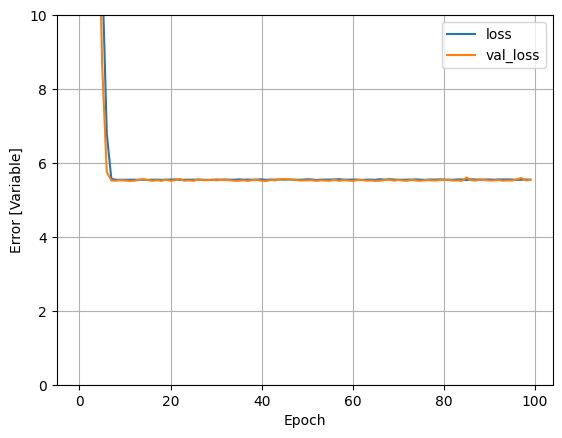

In [21]:
plot_loss(history)

In [22]:
# Save data for comparison later
test_results = {}

test_results['avgTemp_model'] = avgTemp_model.evaluate(
    test_features['TAVG (Degrees Fahrenheit)'],
    test_labels, verbose=0)

#### here we do some stuff that im honestly not really sure how it works but i do know that it shows a bunch of predictions of the model. Exquisite

In [23]:
x = tf.linspace(0.0, 250, 251)
y = avgTemp_model.predict(x)

8/8 [==============================] - 0s 571us/step


In [24]:
def plot_avgTemp(x, y):
  plt.scatter(train_features['TAVG (Degrees Fahrenheit)'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('avgTemp')
  plt.ylabel('next avgTemp')
  plt.legend()

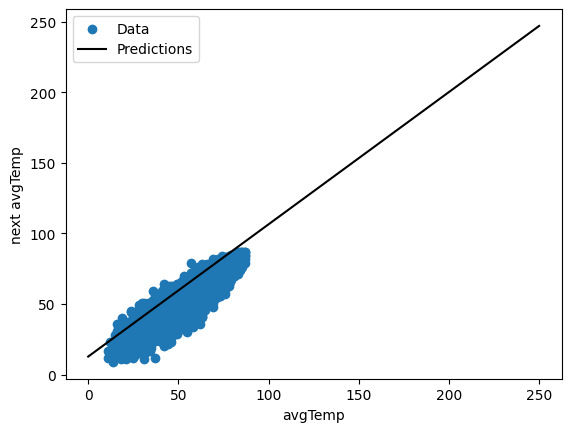

In [25]:
plot_avgTemp(x, y)

# Linear Regression with multiple inputs
#### mediocre amounts of fun

In [26]:
# Make model
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [27]:
# Test untrained model (not good (unsurprising))
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 34ms/step


array([[-0.757],
       [ 2.758],
       [-0.755],
       [-1.666],
       [ 0.521],
       [-0.409],
       [-0.051],
       [-0.108],
       [ 0.034],
       [ 2.38 ]], dtype=float32)

In [28]:
# We make sure kernel weights are (9, 1)
# linear_model.layers[1].kernel
# This doesn't work anymore and im not sure why cause a lot of it is copy pasted from tensorflow's wiki...
# Probably deprecated. IDK what it means anyways sooo its not that important

In [29]:
# Make model but actually this time
linear_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [30]:
%%time
# TRAINING!!!!!!!!!!!!!!!
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=universal_epochs,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: total: 13.1 s
Wall time: 9.36 s


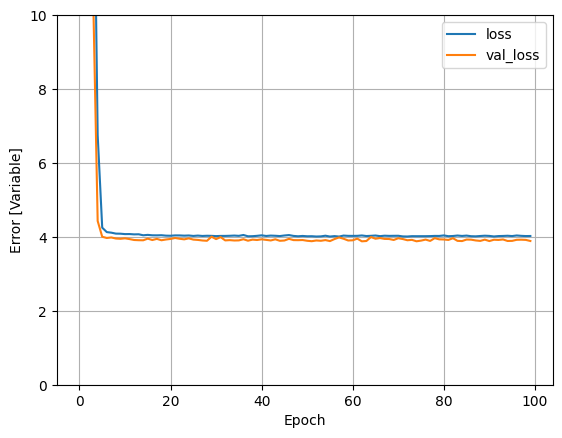

In [31]:
# Genuinely freigthenad (<--- impossible to spell word) spooky results. kinda wishing there was less error no lies
plot_loss(history)

In [32]:
# Save RESULTS!!!!!!
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

# Regression with DEEP NEURAL NETWORK!!!!! WOOOO
#### mild fun ahead

In [33]:
# We make a function here to build our models because both models will end up using the same thing
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(loss='mean_absolute_error',
                  optimizer = tf.keras.optimizers.Adam(0.001))
    return model

#### single input (bummer)

In [34]:
# We are gonna make a dnn model with only min temp
dnn_avgTemp_model = build_and_compile_model(avgTemp_normalizer)

In [35]:
# Overview of the model
dnn_avgTemp_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 module_wrapper_2 (ModuleWra  (None, 64)               128       
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 64)               4160      
 pper)                                                           
                                                                 
 module_wrapper_4 (ModuleWra  (None, 1)                65        
 pper)                                                           
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-traina

In [36]:
%%time
# TRAIN IT!!!!!!!
history = dnn_avgTemp_model.fit(
    train_features['TAVG (Degrees Fahrenheit)'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=universal_epochs)

CPU times: total: 18.4 s
Wall time: 10.4 s


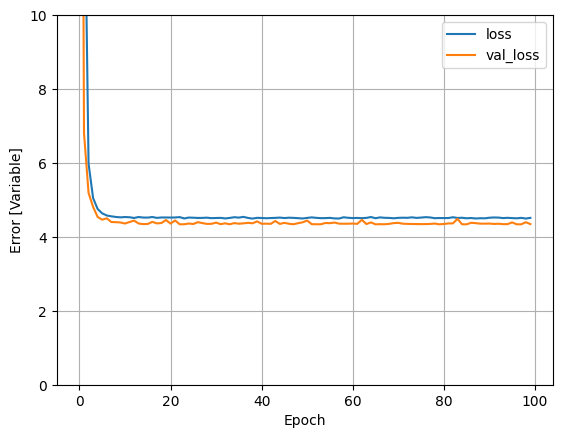

In [37]:
# It should do a smidge better than the linear model 
plot_loss(history)

#### here we do some MORE stuff that im honestly not really sure how it works but i do know that it shows a bunch of predictions of the model. Exquisite

In [38]:
x = tf.linspace(0.0, 250, 251)
y = dnn_avgTemp_model.predict(x)

8/8 [==============================] - 0s 714us/step


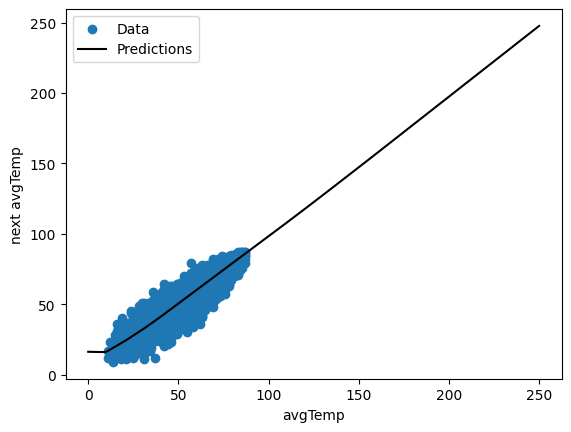

In [39]:
# Hey that looks kinda better not even gonna lie!
plot_avgTemp(x, y)

In [40]:
# Save results
test_results['dnn_avgTemp_model'] = dnn_avgTemp_model.evaluate(
    test_features['TAVG (Degrees Fahrenheit)'], test_labels,
    verbose=0)

# REGRESSION USING DNN WITH MULTIPLE INPUTS!!!!!!!!!! YIPPPEEEEE!!!!
#### super awesome omega fun incoming...

In [41]:
# Make the model and look at an overview of it
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 7)                15        
 n)                                                              
                                                                 
 module_wrapper_5 (ModuleWra  (None, 64)               512       
 pper)                                                           
                                                                 
 module_wrapper_6 (ModuleWra  (None, 64)               4160      
 pper)                                                           
                                                                 
 module_wrapper_7 (ModuleWra  (None, 1)                65        
 pper)                                                           
                                                                 
Total params: 4,752
Trainable params: 4,737
Non-traina

In [42]:
%%time
# TRAIN IT!!!!!!!!!!!!
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=universal_epochs)

CPU times: total: 19.1 s
Wall time: 10.6 s


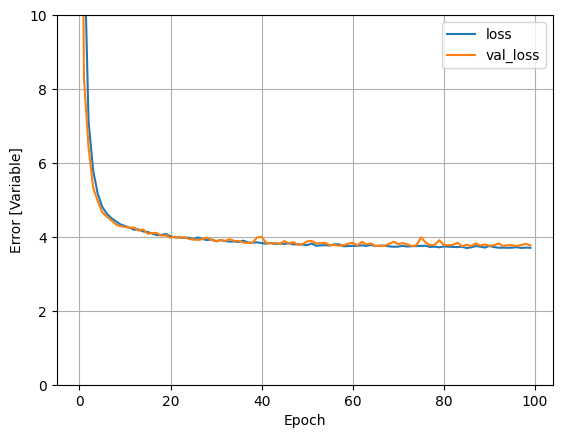

In [43]:
# Plot the loss of the thingggg
plot_loss(history)

In [44]:
# Collect data!!
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

# Overview of performance
#### boring data (but fun statistics)

In [50]:
# Give a table showing performance of the 4 models
pd.DataFrame(test_results, index=['Mean absolute error [Avg Temp]']).T

,Mean absolute error [Avg Temp]
avgTemp_model,9.382034
linear_model,4.180818
dnn_avgTemp_model,4.652243
dnn_model,4.023953
reloaded,4.023953


# Predictions
#### kinda cool

37/37 [==============================] - 0s 611us/step


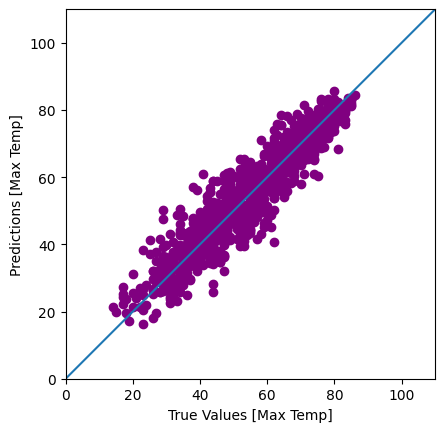

In [46]:
# Make predictions
test_predictions = dnn_model.predict(test_features).flatten()
# Plot it
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions, color='purple')
plt.xlabel('True Values [Max Temp]')
plt.ylabel('Predictions [Max Temp]')
lims = [0, 110]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

#### ok thats not great im not gonna lie

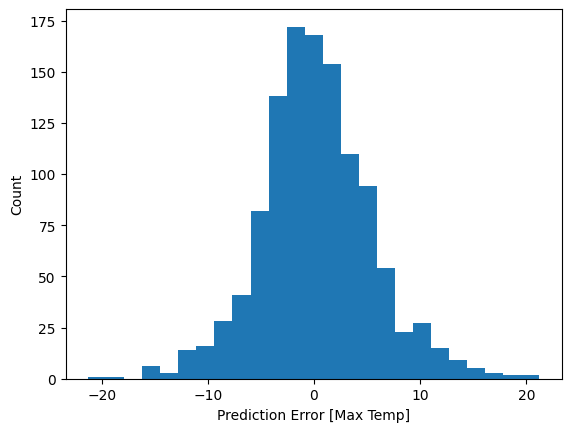

In [47]:
# Lets check the error distribution
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Max Temp]')
_ = plt.ylabel('Count')

#### you know it actually isn't too bad, but DEFINITELY has room for improvement 

# Stuff for saving models and such, not really important for making models but important steps for after u have a good one
#### omega boring but required

In [48]:
# Save it
dnn_model.save('dnn_model_testrun')

INFO:tensorflow:Assets written to: dnn_model_testrun\assets


INFO:tensorflow:Assets written to: dnn_model_testrun\assets


In [49]:
#and if u reload it then it will give the same results

reloaded = tf.keras.models.load_model('dnn_model_testrun')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

pd.DataFrame(test_results, index=['Mean absolute error [Max Temp]']).T

,Mean absolute error [Max Temp]
avgTemp_model,9.382034
linear_model,4.180818
dnn_avgTemp_model,4.652243
dnn_model,4.023953
reloaded,4.023953
